# scaredyrat-FC analyzes data from fear conditioning protocol

In [1]:
# notebook formatting and loading settings, imports - keep same

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os, sys

sys.path.append('../src')
import scaredyrattools as sr

# Change variables in this cell:

In [2]:
inpath = r'C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018'

outpath = r'C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\SR_OUT'

ntones = 12

#filelist = ['Raw data-PFC-PAG DREADDs July 2018-Trial     1.xlsx',
#            'Raw data-PFC-PAG DREADDs July 2018-Trial     4.xlsx',
#            'Raw data-PFC-PAG DREADDs July 2018-Trial     5.xlsx',
#            'Raw data-PFC-PAG DREADDs July 2018-Trial     6.xlsx',
#            'Raw data-PFC-PAG DREADDs July 2018-Trial    13.xlsx']

filelist = []
for entry in os.scandir(inpath):
    if entry.is_file():
        filelist.append(entry.path)
#print(filelist)

In [3]:
## don't need to change this - stays constant across files
sheetlist = ['Track-Arena 1-Subject 1', 'Track-Arena 2-Subject 1', 
             'Track-Arena 3-Subject 1', 'Track-Arena 4-Subject 1']

# Function calls below

C:\Users\Sean\Anaconda3\lib\site-packages\pandas\util\_decorators.py:177: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)
C:\Users\Sean\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     1.xlsx Track-Arena 1-Subject 1 is UF1 in Fear Conditioning
Fear Conditioning
UF1


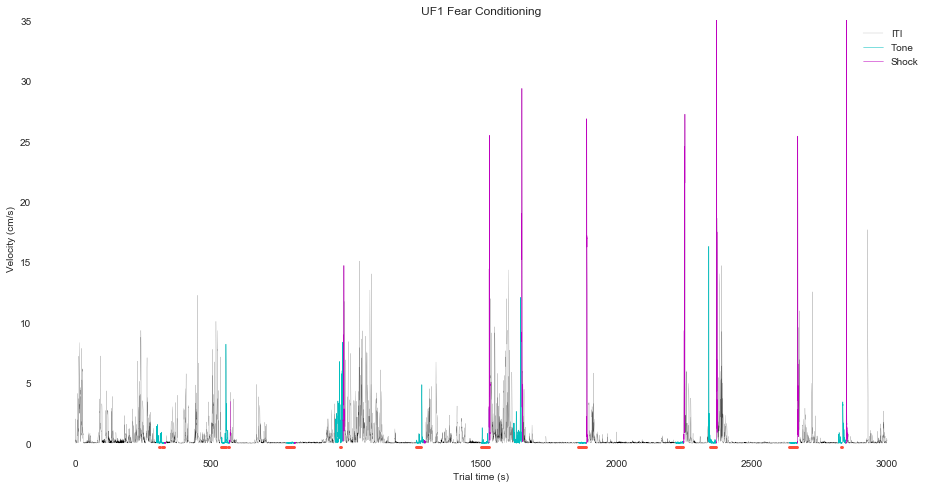

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     1.xlsx Track-Arena 2-Subject 1 is UF2 in Fear Conditioning
Fear Conditioning
UF2


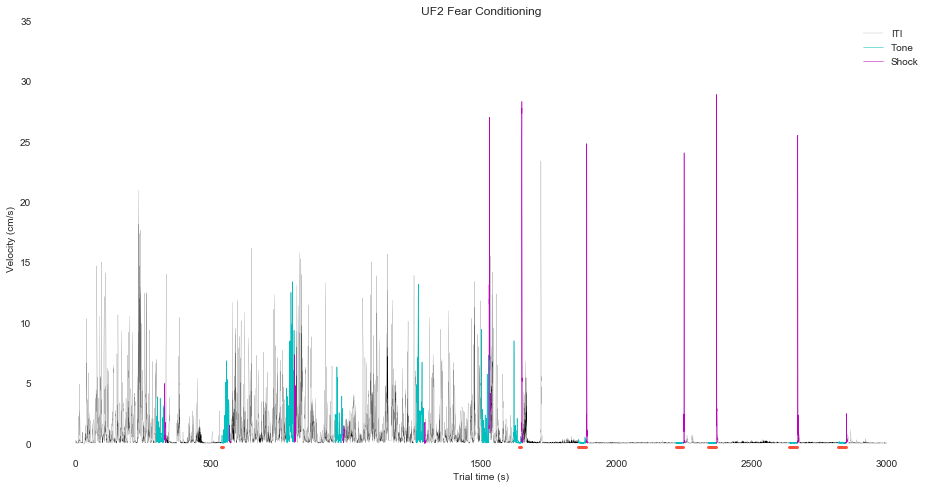

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     1.xlsx Track-Arena 3-Subject 1 is CF1 in Fear Conditioning
Fear Conditioning
CF1


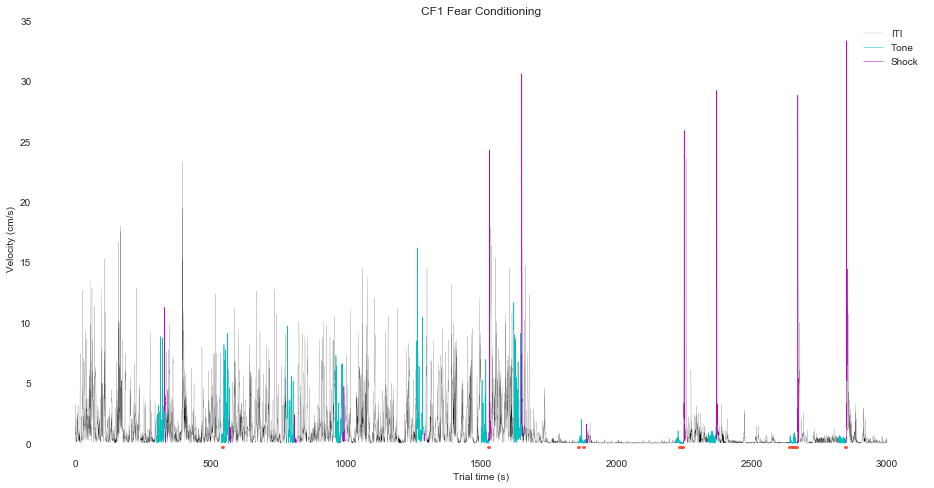

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     1.xlsx Track-Arena 4-Subject 1 is CF2 in Fear Conditioning
Fear Conditioning
CF2


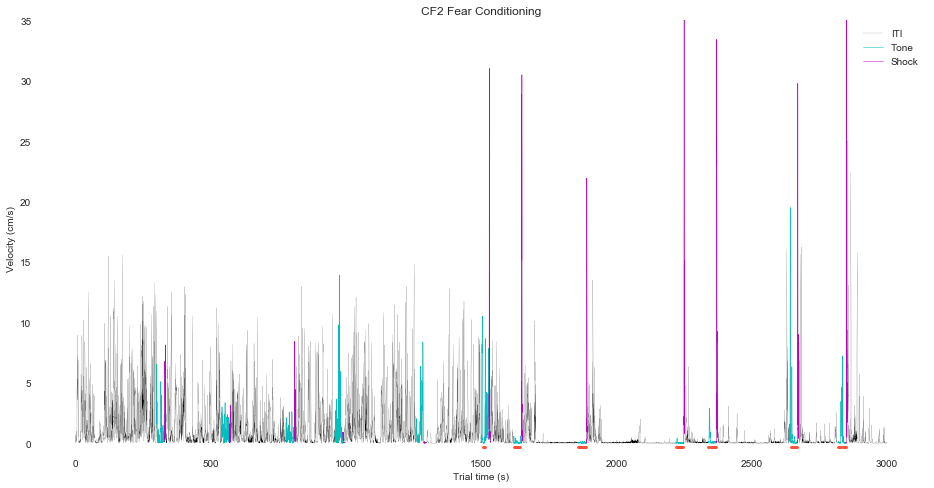

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     2.xlsx Track-Arena 1-Subject 1 is UF3 in Fear Conditioning
Fear Conditioning
UF3


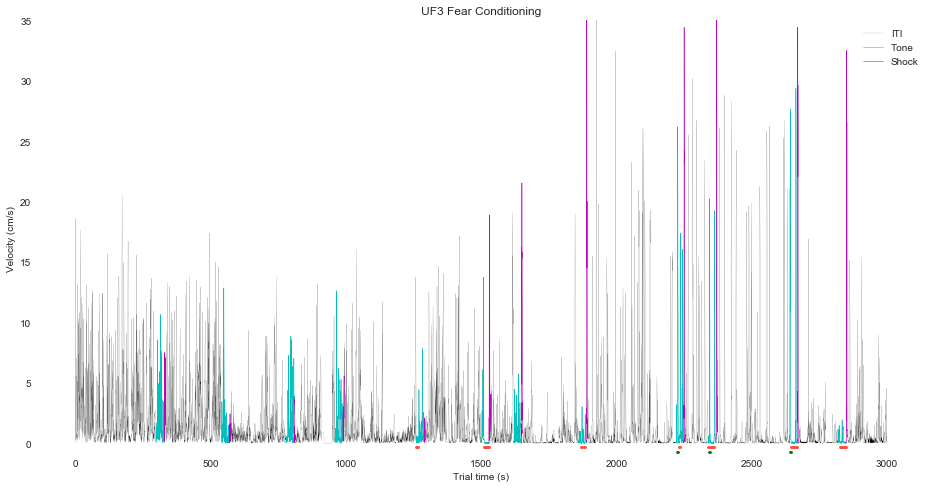

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     2.xlsx Track-Arena 2-Subject 1 is UF4 in Fear Conditioning
Fear Conditioning
UF4


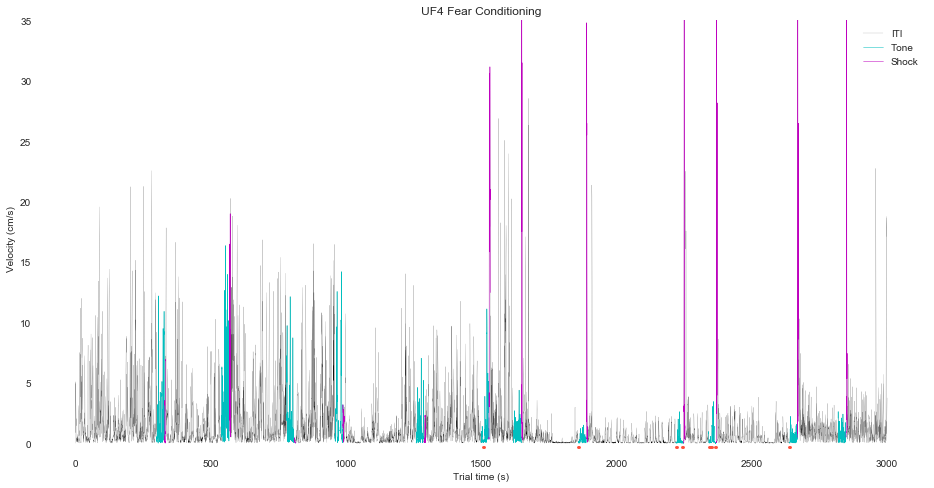

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     2.xlsx Track-Arena 3-Subject 1 is CF3 in Fear Conditioning
Fear Conditioning
CF3


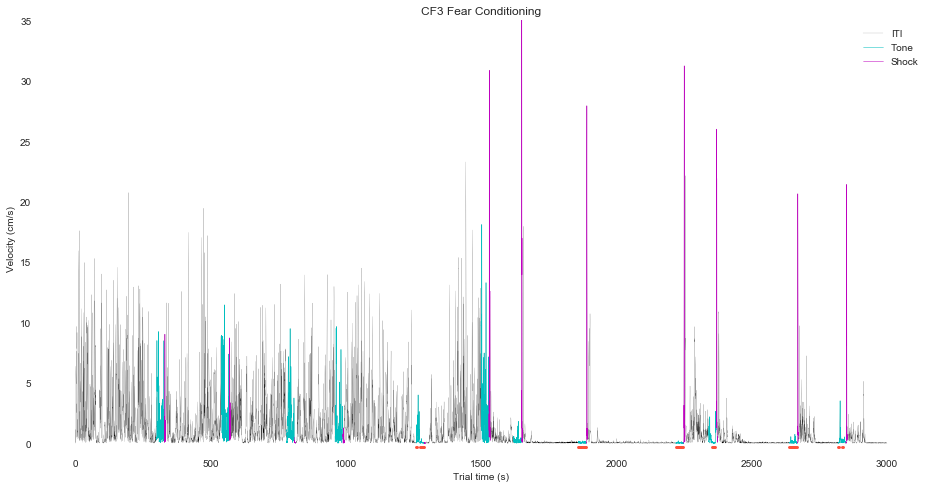

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     2.xlsx Track-Arena 4-Subject 1 is CF4 in Fear Conditioning
Fear Conditioning
CF4


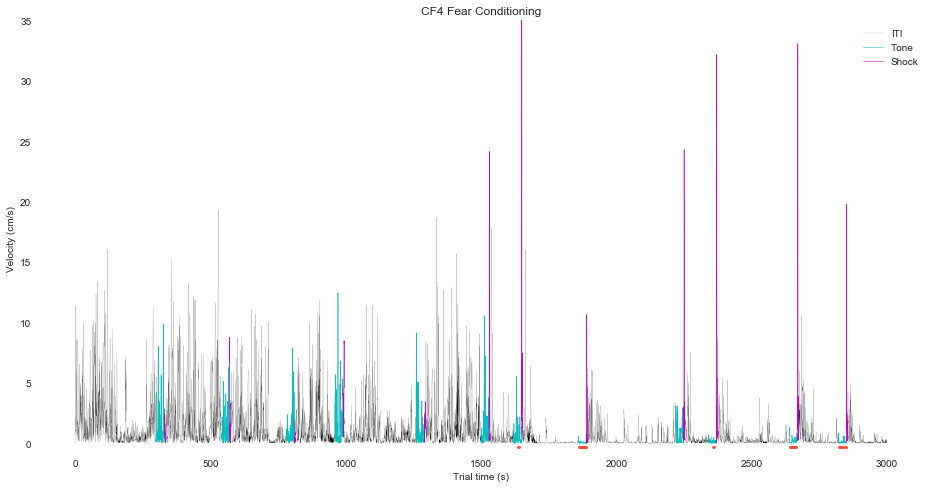

C:\Users\Sean\Desktop\ShanskyLab_Projects\TestData\Summer_1_Darting_2018\Raw data-Darting Stress Summer 2018-Trial     3.xlsx Track-Arena 1-Subject 1 is UF1 in Extinction Learning


In [ ]:
for file in filelist:
    for sheet in sheetlist:
        ## set input/output info
        ID,ctx,anim = sr.animal_read(inpath,file,sheet)
        print(ctx)
        print(ID)
        # Check that ctx=="Fear Conditioning"
        if(ctx != "Fear Conditioning" or ID == "-1" or ID=="nan" or (isinstance(ID,float) and math.isnan(float(ID)))):
            continue
        ## use scaredyrattools function to find where each epoch is
        baseline =sr.find_baseline(anim)
        tones = sr.find_tones(anim, ntones)
        pretones = sr.find_pretones(anim, ntones)
        shocks = sr.find_shock_responses(anim, ntones)
        pshocks = sr.find_postshocks(anim, ntones)
        
        ## use scaredyrattools function to calculate baseline freezing
        baselineFreezing, bFTs = sr.get_baseline_freezing(baseline, freezingThreshold=0.1, binSecs=1)
        BaselineOutfile = outpath + '/FC-baseline-freezing-{}.csv' 
        BaselineOutfile = BaselineOutfile.format(ID)
        bFreezing = pd.concat([baselineFreezing],axis=1)
        bFreezing.to_csv(BaselineOutfile)

        ## use scaredyrattools function to find top n velocities
        mtone = sr.get_top_vels(tones,10,ntones)
        mptone = sr.get_top_vels(pretones,10,ntones)
        mshock = sr.get_top_vels(shocks,5,ntones)
        mpshock = sr.get_top_vels(pshocks,10,ntones)

        ## define names of CSV files to save to
        mToneOutfile = outpath + '/FC-tone-max-vels-{}.csv' 
        mToneOutfile = mToneOutfile.format(ID)

        mPToneOutfile = outpath + '/FC-pretone-max-vels-{}.csv' 
        mPToneOutfile = mPToneOutfile.format(ID)

        mShockOutfile = outpath + '/FC-shock-max-vels-{}.csv' 
        mShockOutfile = mShockOutfile.format(ID)

        mPShockOutfile = outpath + '/FC-postshock-max-vels-{}.csv' 
        mPShockOutfile = mPShockOutfile.format(ID)

        ## send files to previously defined CSVs
        mtone.to_csv(mToneOutfile)
        mptone.to_csv(mPToneOutfile)
        mshock.to_csv(mShockOutfile)
        mpshock.to_csv(mPShockOutfile)

        ## use scaredyrattools function to find means
        tmeans = sr.get_means(tones,'Tone',ntones)
        ptmeans = sr.get_means(pretones,'Pre-tone',ntones)
        smeans = sr.get_means(shocks,'Shock',ntones)
        pshockmeans = sr.get_means(pshocks,'Post-shock',ntones)
        allmeans = pd.concat([tmeans, ptmeans, smeans, pshockmeans],axis=1)

        ## use scaredyrattools function to find SEMs
        tSEMs = sr.get_SEMs(tones,'Tone',ntones)
        ptSEMs = sr.get_SEMs(pretones,'Pre-tone',ntones)
        sSEMs = sr.get_SEMs(shocks,'Shock',ntones)
        pshockSEMs = sr.get_SEMs(pshocks,'Post-shock',ntones)
        allSEMs = pd.concat([tSEMs, ptSEMs, sSEMs, pshockSEMs],axis=1)

        ## use scaredyrattools function to find medians
        tmeds = sr.get_meds(tones,'Tone',ntones)
        ptmeds = sr.get_meds(pretones,'Pre-tone',ntones)
        smeds = sr.get_meds(shocks,'Shock',ntones)
        pshockmeds = sr.get_meds(pshocks,'Post-shock',ntones)
        allmeds = pd.concat([tmeds, ptmeds, smeds, pshockmeds],axis=1)

        ## sr freezing tools
        toneFreezing, FTs = sr.get_freezing(tones,ntones,freezingThreshold=0.1, binSecs=1)
        ptFreezing, ptFTs = sr.get_freezing(pretones,ntones,freezingThreshold=0.1, binSecs=1)
        shockFreezing, shockFTs = sr.get_freezing(shocks,ntones,freezingThreshold=0.1, binSecs=1)
        pshockFreezing, pshockFTs = sr.get_freezing(pshocks,ntones,freezingThreshold=0.1, binSecs=1)

        allFreezing = pd.concat([toneFreezing, ptFreezing, shockFreezing, pshockFreezing],axis=1)
        
        ## sr darting tools
        toneDarting, DTs = sr.get_darting(tones,ntones,dartThreshold=20, binSecs=2)
        ptDarting, ptDTs = sr.get_darting(pretones,ntones,dartThreshold=20, binSecs=2)
        shockDarting, shockDTs = sr.get_darting(shocks,ntones,dartThreshold=20, binSecs=2)
        pshockDarting, pshockDTs = sr.get_darting(pshocks,ntones,dartThreshold=20, binSecs=2)

        allDarting = pd.concat([toneDarting, ptDarting, shockDarting, pshockDarting],axis=1)
        
        ## define names of CSV files to save to
        meanOutfile = outpath + '/FC-mean-{}.csv' 
        meanOutfile = meanOutfile.format(ID)

        SEMOutfile = outpath + '/FC-SEM-{}.csv' 
        SEMOutfile = SEMOutfile.format(ID)

        medOutfile = outpath + '/FC-med-{}.csv' 
        medOutfile = medOutfile.format(ID)

        freezingOutfile = outpath + '/FC-freezing-{}.csv'
        freezingOutfile = freezingOutfile.format(ID)
        
        dartingOutfile = outpath + '/FC-darting-{}.csv'
        dartingOutfile = dartingOutfile.format(ID)

        allmeans.to_csv(meanOutfile)
        allSEMs.to_csv(SEMOutfile)
        allmeds.to_csv(medOutfile)
        allFreezing.to_csv(freezingOutfile)
        allDarting.to_csv(dartingOutfile)

        ## plot stuff
        vels = pd.DataFrame(anim['Velocity'])

        plt.style.use('seaborn-white')
        plt.figure(figsize=(16,8),facecolor='white',edgecolor='white')

        # Plots main velocity in black
        line1, = plt.plot(vels,color='k',linewidth=0.1,label='ITI')

        # Loops through tones, plots each one in cyan
        i = 1
        while i <= ntones:
            tone = sr.find_tone_vels(anim,i)
            line2, = plt.plot(tone,color='c',linewidth=0.5,label='Tone')
            i += 1

        # Loops through shocks, plots each one in magenta
        i = 1
        while i <= ntones:
            sresponse = sr.find_shock_vels(anim,i)
            line3, = plt.plot(sresponse,color='m',linewidth=0.5,label='Shock')
            i += 1

        # Loops through freezing bins, plots each below the x-axis
        for timebin in FTs:
            plt.plot([timebin[0],timebin[1]],[-0.3,-0.3],color='#ff4f38',linewidth=3)

        # Loops through darting bins, plots each below the x-axis
        for timebin in DTs:
            plt.plot([timebin[0],timebin[1]],[-0.7,-0.7],color='#167512',linewidth=3)
            
        plt.ylim(-1,35)

        sns.despine(left=True, bottom=True, right=True)
        plt.title(ID + " Fear Conditioning")
        plt.legend(handles=[line1,line2,line3])
        plt.ylabel('Velocity (cm/s)')
        plt.xlabel('Trial time (s)')

        ## define where to save the fig
        fname = outpath + '/FC-plot-{}'
        fname = fname.format(ID)

        plt.savefig(fname, dpi=300)

        plt.show()
        plt.close()